In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='dark', palette='muted')

In [2]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [3]:
train_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_raw.shape

(614, 13)

In [5]:
train_raw.drop('Loan_ID', axis=1, inplace=True)
test_raw.drop('Loan_ID', axis=1, inplace=True)

In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
train_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_raw.isna().sum()/train_raw.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed',
                    'Loan_Amount_Term','Credit_History','Property_Area']

Jumlah class Y: 422
Jumlah class N: 192


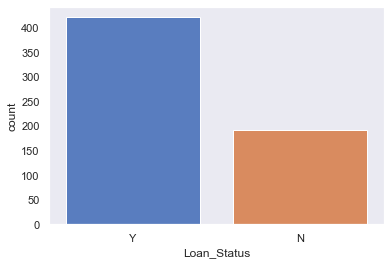

In [10]:
Y, N = train_raw['Loan_Status'].value_counts()
print('Jumlah class Y:', Y)
print('Jumlah class N:', N)
sns.countplot(train_raw.Loan_Status)
plt.show()

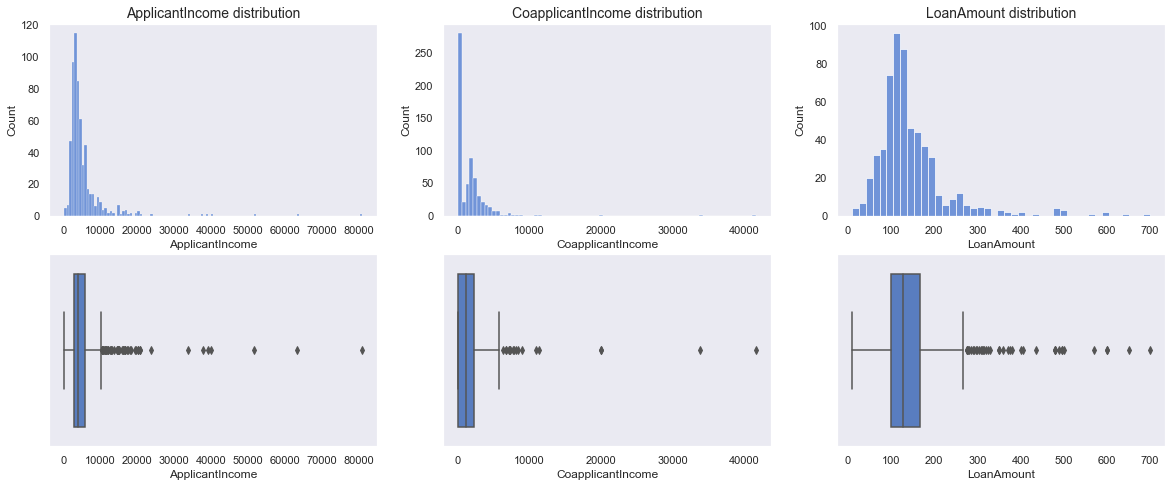

In [11]:
plt.figure(figsize=(20,12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(train_raw[col])
    plt.title(col + ' distribution', fontsize=14)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+4)
    sns.boxplot(train_raw[col])

In [12]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

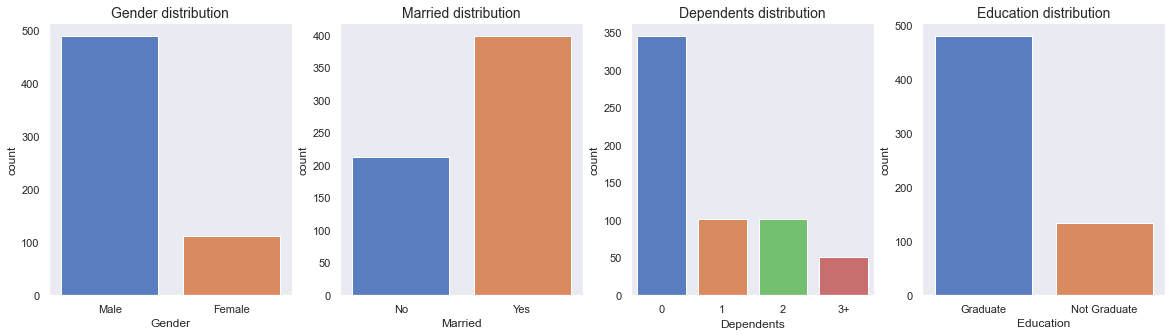

In [13]:
plt.figure(figsize=(20,5))
for i, col in enumerate(categorical_cols[:4]):
    plt.subplot(1,4,i+1)
    sns.countplot(train_raw[col])
    plt.title(col + ' distribution', fontsize=14)

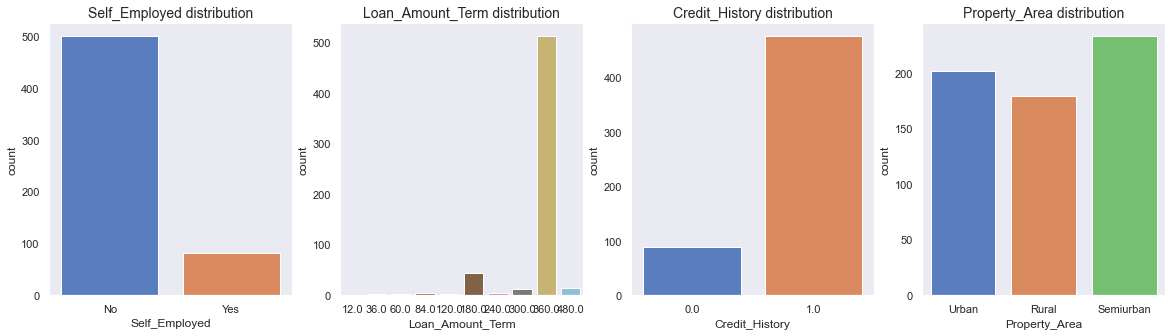

In [14]:
plt.figure(figsize=(20,5))
for i, col in enumerate(categorical_cols[4:]):
    plt.subplot(1,4,i+1)
    sns.countplot(train_raw[col])
    plt.title(col + ' distribution', fontsize=14)

In [15]:
#train_raw['Total Income'] = train_raw.ApplicantIncome + train_raw.CoapplicantIncome
#bins = [0, 2500, 4000, 6000, 81000]
#group = ['low', 'Average', 'High', 'Very High']
#train_raw['Total_Income_bin'] = pd.cut(train_raw['Total Income'], bins, labels=group)

In [16]:
#train_raw.head()

In [17]:
#sns.countplot(data=train_raw, x='Total_Income_bin',  hue='Loan_Status')

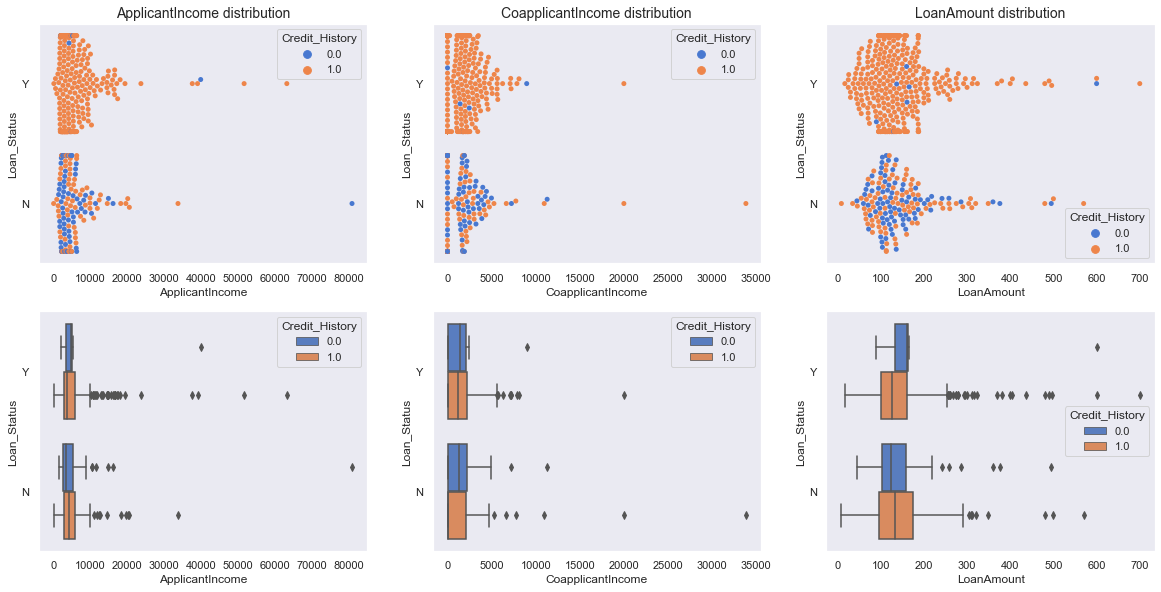

In [18]:
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.swarmplot(data=train_raw, x=col, y='Loan_Status', hue='Credit_History')
    plt.title(col + ' distribution', fontsize=14)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+4)
    sns.boxplot(data=train_raw, x=col, y='Loan_Status', hue='Credit_History')

In [19]:
train_raw['Credit_History'].isna().sum()

50

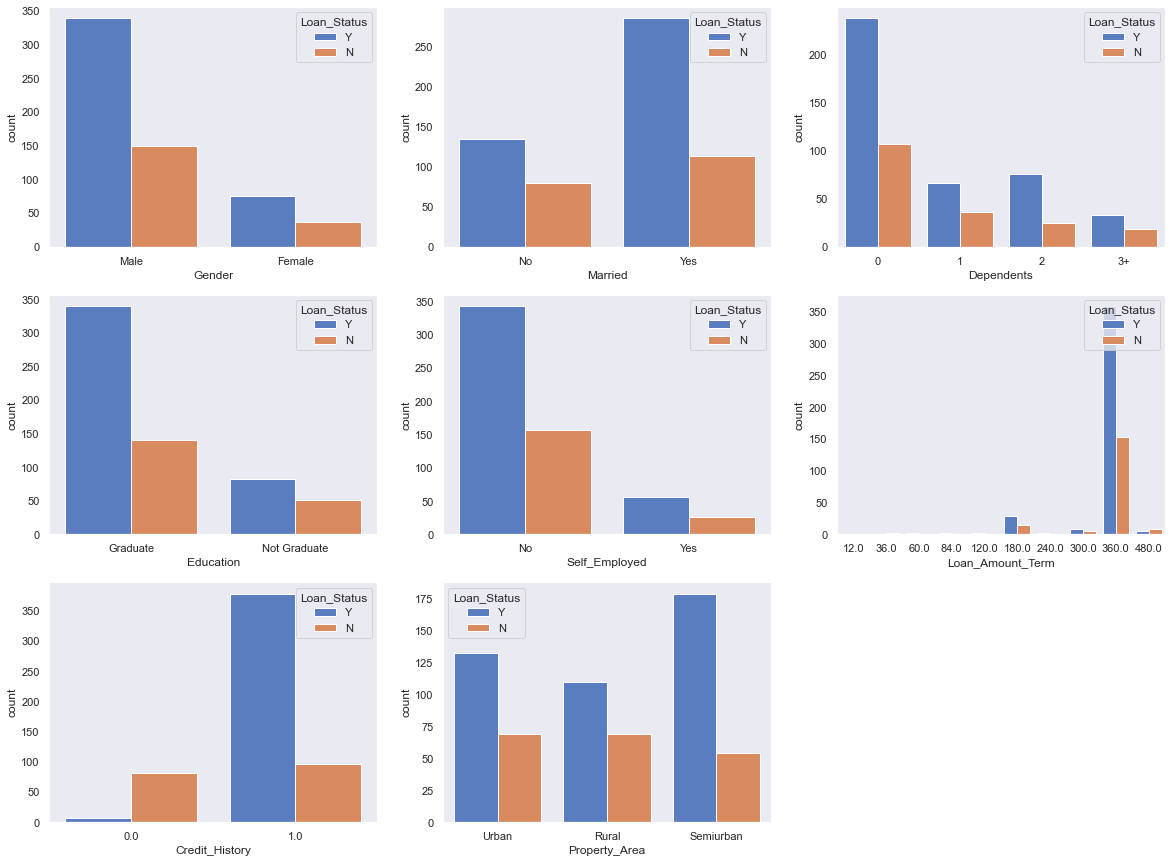

In [20]:
plt.figure(figsize=(20,15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(col, hue='Loan_Status', data=train_raw)

## Preprocessing

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, cross_validate
from xgboost import XGBClassifier

In [22]:
X = train_raw.drop('Loan_Status', axis=1)
y = train_raw['Loan_Status']
X_test = test_raw


### Missing Value

In [23]:
na_col = pd.DataFrame(X.isna().sum()) 
na_col.columns = ['NA Train']
na_col['NA Test'] = X_test.isna().sum().values 
round(na_col, 2)

,NA Train,NA Test
Gender,13,11
Married,3,0
Dependents,15,10
Education,0,0
Self_Employed,32,23
ApplicantIncome,0,0
CoapplicantIncome,0,0
LoanAmount,22,5
Loan_Amount_Term,14,6
Credit_History,50,29


In [24]:
def plot_dist(data, cols, set_name):
    plt.figure(figsize=(20,12))
    for i, col in enumerate(cols):
        plt.subplot(3,3,i+1)
        sns.histplot(data[col])
        plt.title(col + ' distribution in ' + set_name, fontsize=14)
    for i, col in enumerate(cols):
        plt.subplot(3,3,i+4)
        sns.boxplot(data[col])

In [25]:
def feature_enginering(data):
    data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
    data['EMI'] = data['TotalIncome'] / data['Loan_Amount_Term'].astype('float')

    data['TotalIncome'] = np.log(data['TotalIncome'])
    data['LoanAmount'] = np.log(data['LoanAmount'])
    data['EMI'] = np.log(data['EMI'])

    data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)
    return data

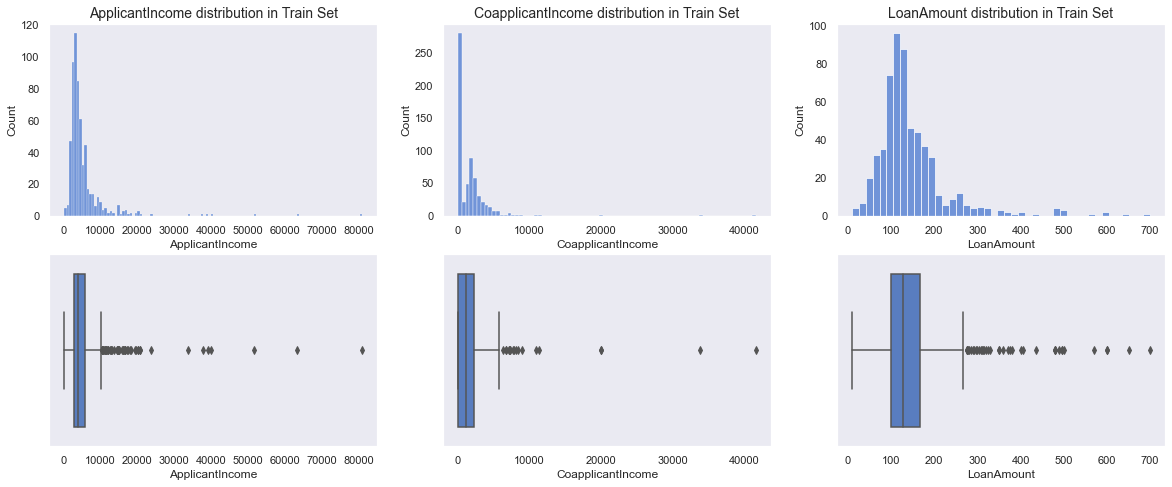

In [26]:
plot_dist(X, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 'Train Set')

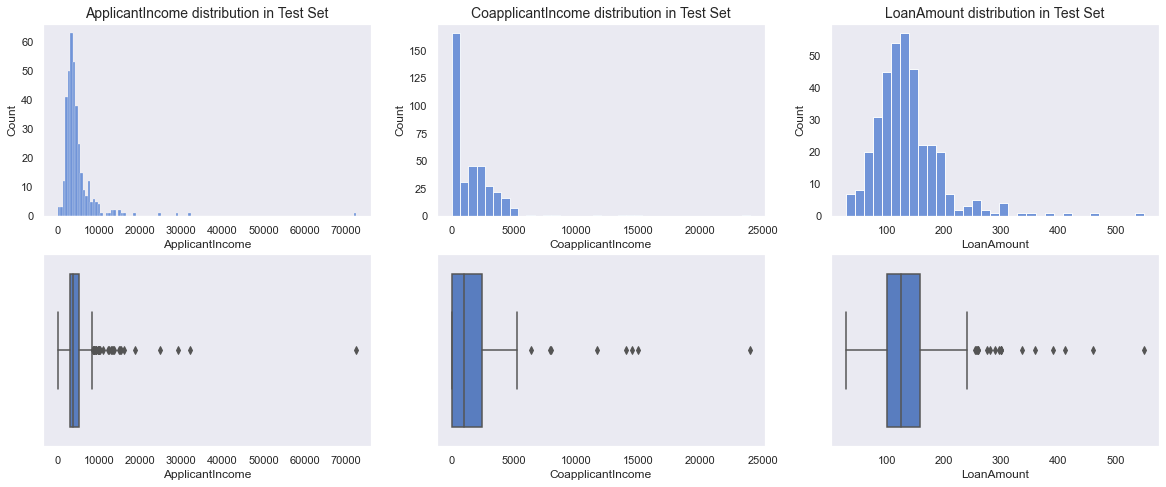

In [27]:
plot_dist(X_test, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 'Test Set')

In [28]:
X = feature_enginering(X)
X_test = feature_enginering(X_test)

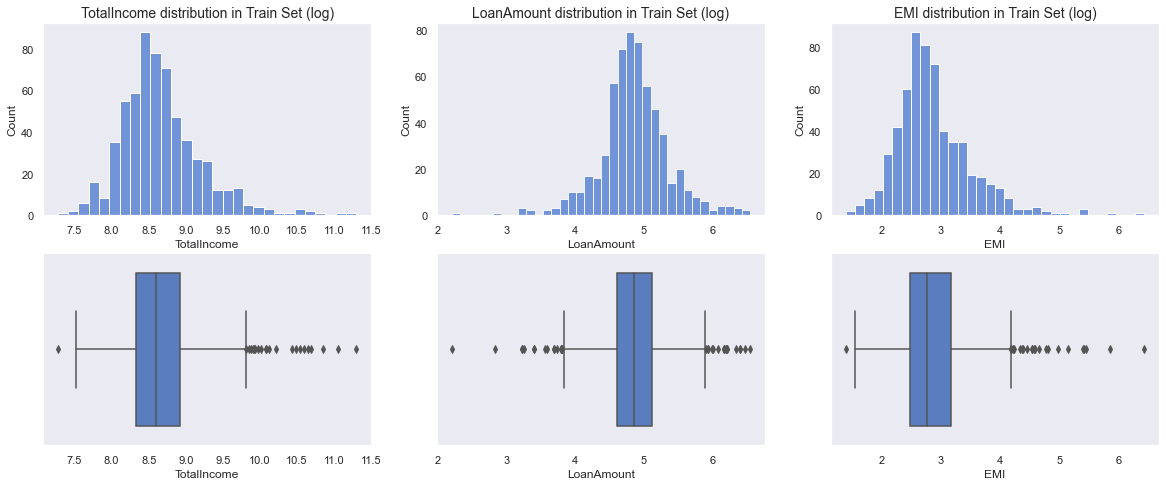

In [29]:
plot_dist(X, ['TotalIncome', 'LoanAmount', 'EMI'], 'Train Set (log)')

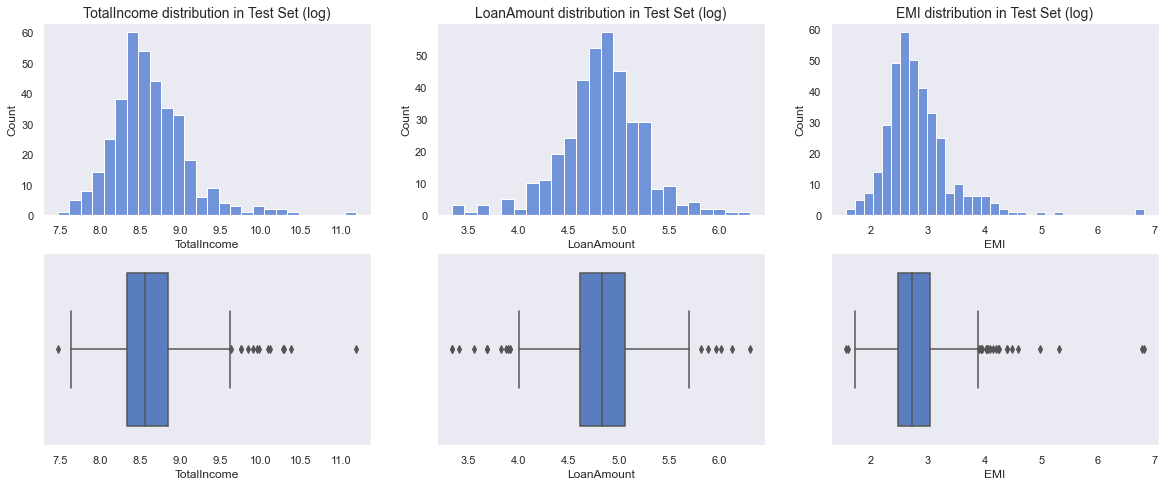

In [30]:
plot_dist(X_test, ['TotalIncome', 'LoanAmount' , 'EMI'], 'Test Set (log)')

In [31]:
y = train_raw['Loan_Status']
y = LabelEncoder().fit_transform(y)

## Pipeline

In [32]:
numerical_cols = ['LoanAmount', 'TotalIncome', 'EMI']
cat_binnary_col = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
cat_onehot_col = ['Dependents', 'Loan_Amount_Term', 'Property_Area']

In [33]:
numerical_transformer = SimpleImputer(strategy='median')

categorical_binnary = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', ce.OrdinalEncoder())
])

categorical_onehot = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat_bin', categorical_binnary, cat_binnary_col),
    ('cat_oh', categorical_onehot, cat_onehot_col)
])

In [34]:
X_clean = preprocessor.fit_transform(X)
X_test_clean = preprocessor.transform(X_test)

In [35]:
X_clean.shape, X_test_clean.shape

((614, 25), (367, 25))

In [41]:
parameters = {
                'n_estimators': list(range(10, 500, 50)),
                'learning_rate': [0.01, 0.03, 0.06, 0.1],
                'max_depth' : list(range(3,11))
             }

grid_search = GridSearchCV(estimator = XGBClassifier(),
                           param_grid = parameters,
                           scoring='f1')
grid_search.fit(X_clean,y)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8766645182984887
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}


In [37]:
cv  = cross_validate(grid_search, X_clean, y, cv=10, scoring='f1', return_train_score=True)
print('Train score:', np.mean(cv['train_score']))
print('Test score:', np.mean(cv['test_score']))

Train score: 0.8979730455795873
Test score: 0.86380147135357


In [38]:
submit = pd.read_csv('test.csv')

preds_test = grid_search.predict(X_test_clean)
output = pd.DataFrame({'Loan_ID': submit['Loan_ID'],
                       'Loan_Status': preds_test})
mapping = {1:'Y', 0:'N'}
output['Loan_Status'] = output['Loan_Status'].map(mapping)
output.to_csv('submission.csv', index=False)